In [1]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf  
from tensorflow import keras  
from tensorflow.keras import layers  
from tensorflow.keras import losses 
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam, SGD, Nadam, Adamax, Adagrad, RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint



In [ ]:
import os

#base_dir ="C:/Users/HP/Desktop/deep learning/image/brain_tumor_dataset"
base_dir =  r"C:\Users\HP\Desktop\deep learning\image\brain_tumor_dataset"
img_size = (128, 128)

In [3]:
x=[]
y=[]

In [4]:
import os

In [5]:
from tensorflow.keras.utils import load_img, img_to_array


In [ ]:
# Parcours des sous-dossiers (classes)
from tensorflow.keras.utils import load_img, img_to_array
for label in os.listdir(base_dir):
    label_path = os.path.join(base_dir, label)
    if os.path.isdir(label_path):
        for file in os.listdir(label_path):
            file_path = os.path.join(label_path, file)
            try:
                # Chargement de l'image et redimensionnement
                img = load_img(file_path, target_size=img_size)
                img_array = img_to_array(img) / 255.0  # Normalisation
                x.append(img_array)
                y.append(label)  # Nom du dossier = classe
            except Exception as e:
                print(f"Erreur avec {file_path} : {e}")


In [7]:
# Conversion en numpy array
x = np.array(x, dtype="float32")
y = np.array(y)

In [8]:
# Encodage des labels (ex: “yes” = 0, “no” = 1)
le = LabelEncoder()
y_encoded = le.fit_transform(y)


In [9]:
# print(y_encoded[:10])          
# print(type(y_encoded[0]))      
# print(set(y_encoded))       


In [10]:
x.shape

(253, 128, 128, 3)

In [11]:
y.shape

(253,)

In [12]:
from sklearn.utils import shuffle
x,y=shuffle(x,y,random_state=42)

In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.85, random_state=42)


In [14]:
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

In [15]:
y_train

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1], dtype=int64)

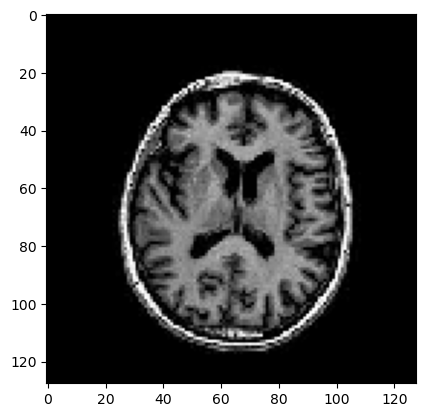

In [16]:
import matplotlib.pyplot as plt
for i in range(0,3):
    plt.imshow(x_test[i],cmap='grey')
    plt.show

In [17]:
x_train=np.expand_dims(x_train,axis=3)
x_test=np.expand_dims(x_test,axis=3)

In [18]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)


(215, 128, 128, 1, 3)
(38, 128, 128, 1, 3)
(215,)


In [ ]:
# Normalisation: 
train_images = x_train.astype("float32") / 255
test_images = x_test.astype("float32") / 255


In [20]:
x_train=np.squeeze(x_train)
x_test=np.squeeze(x_test)
print(x_train.shape)
print(x_test.shape)

(215, 128, 128, 3)
(38, 128, 128, 3)


In [21]:
from tensorflow.keras.regularizers import l1

In [22]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

model = Sequential([
    Conv2D(filters=128, kernel_size=(3, 3), strides=(2, 2), activation='relu',
           kernel_regularizer=l1(0.01), input_shape=(128, 128, 3)),
    
    MaxPooling2D(pool_size=(3, 3), strides=(1, 1)),  
    
    Conv2D(128, (3, 3), strides=(2, 2), activation='relu', padding='same'),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    Conv2D(64, (3, 2), activation='relu', padding='same'),

    Flatten(),

    Dense(100, activation='relu'),
    Dropout(0.3),
    Dense(300, activation='relu'),
    Dropout(0.3),
    Dense(200, activation='relu'),
    Dense(200, activation='relu'),

    Dense(1, activation='sigmoid')  # Pour classification binaire
])

model.summary()

c:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 63, 63, 128)    │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 61, 61, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 31, 31, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 31, 31, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 31, 31, 64)     │        24,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 61504)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │     6,150,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 300)            │        30,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 200)            │        60,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 200)            │        40,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │           201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,531,001 (24.91 MB)

 Trainable params: 6,531,001 (24.91 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
sgd = tf.keras.optimizers.SGD(0.01)
adam = tf.keras.optimizers.Adam(learning_rate=0.001)
nadam = tf.keras.optimizers.Nadam()
adamax = tf.keras.optimizers.Adamax()
adagrad = tf.keras.optimizers.Adagrad()
RMSprop = tf.keras.optimizers.RMSprop(learning_rate=0.0001)


In [24]:
from tensorflow.keras.losses import BinaryCrossentropy


In [25]:
model.compile(optimizer=adam,
              loss=BinaryCrossentropy(),
              metrics=['accuracy'])


In [26]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint


In [27]:
import numpy as np

x_train = np.array(x_train)
y_train = np.array(y_train)

In [28]:
print(type(y_train))
print(y_train.dtype)
print(y_train[:5])


<class 'numpy.ndarray'>
int64
[1 1 0 1 1]


In [29]:
print(type(x_train))        
print(type(x_train[0]))     
print(x_train[0].shape)     


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(128, 128, 3)


In [30]:
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,patience=4, min_lr=0.00001)

#early_stopping = EarlyStopping(monitor='val_loss',patience=5, restore_best_weights=True)

checkpoint_path = 'C:/Users/HP/Desktop/python/deeplearning/code_dossier/meilleur_model.h5'

checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_accuracy',save_best_only=True, mode='max', verbose=1)

history = model.fit(x_train, y_train, epochs=60,batch_size=30, validation_split=0.2,callbacks=[reduce_lr, checkpoint])


NameError: name 'reduce_lr' is not defined

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Accuracy sur l’ensemble de test :", test_acc)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.8810 - loss: 0.5078 
Accuracy sur l’ensemble de test : 0.8684210777282715


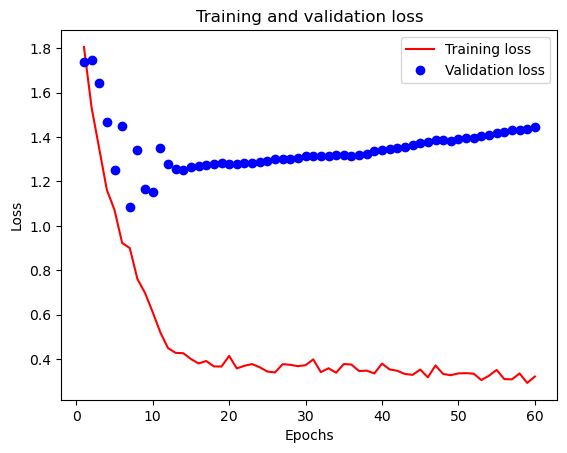

In [ ]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, "r", label="Training loss")
plt.plot(epochs, val_loss_values, "bo", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

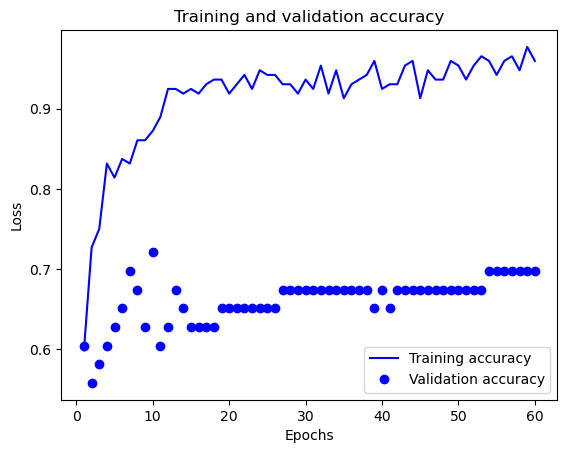

In [ ]:
history_dict = history.history
history_dict.keys()
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["accuracy"]
val_loss_values = history_dict["val_accuracy"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "b", label="Training accuracy")
plt.plot(epochs, val_loss_values, "bo", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
***** confusion matric*****


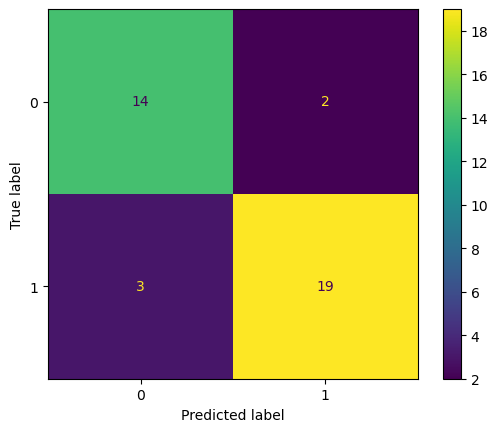

***** precision*****


0.8641456582633054

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix,precision_score
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt


predictions=model.predict(x_test)
y_pred=(predictions > 0.5).astype(int)
print("***** confusion matric*****")
cm = confusion_matrix(y_pred, y_test)
cm
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
print("***** precision*****")
precision_score(y_pred, y_test,average='macro')